Notebook for the one-hot autoencoder

In [1]:
from communications import *
from model import *
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
import pickle

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

100%|██████████| 7/7 [53:10<00:00, 455.81s/it]


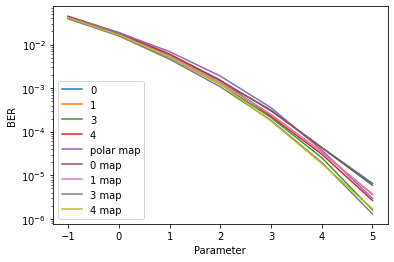

In [3]:
from tensorflow.keras.models import load_model

encoder1,decoder1=load_model('AWGNOHEncoder_0_test.h5',custom_objects={'AWGN':AWGN}),load_model('AWGNOHDecoder_0_test.h5',custom_objects={'AWGN':AWGN},compile=False)
encoder2,decoder2=load_model('AWGNOHEncoder_1_test.h5',custom_objects={'AWGN':AWGN}),load_model('AWGNOHDecoder_1_test.h5',custom_objects={'AWGN':AWGN},compile=False)
encoder3,decoder3=load_model('AWGNOHEncoder_3_test.h5',custom_objects={'AWGN':AWGN}),load_model('AWGNOHDecoder_3_test.h5',custom_objects={'AWGN':AWGN},compile=False)
encoder4,decoder4=load_model('AWGNOHEncoder_4_test.h5',custom_objects={'AWGN':AWGN}),load_model('AWGNOHDecoder_4_test.h5',custom_objects={'AWGN':AWGN},compile=False)


encoder_list,decoder_list=[encoder1,encoder2,encoder3,encoder4],[decoder1,decoder2,decoder3,decoder4]
#encoder_list,decoder_list=[encoder1,encoder2],[decoder1,decoder2]
multBER(encoder_list,decoder_list,'AWGN',[-1,0,1,2,3,4,5],do_polar_MAP=True,enc_MAP_ind=[0,1,2,3],
        save_params=False,params_name=['AWGNparams.npy'],
        save_ber=False,ber_name=['AWGNber_05.npy','AWGNber_1.npy','AWGNber_2.npy','AWGNber_polarmap.npy','AWGNber_05_map.npy','AWGNber_1_map.npy','AWGNber_2_map.npy'],
        plot_ber=True,points_per_value=[200000,200000,400000,400000,1500000,2000000,2500000],plot_legend=['0','1','3','4','polar map','0 map','1 map','3 map','4 map'],
        save_fig=False,fig_name='AWGNPlots.pdf')

In [4]:
np.round([-0.9999,0.999])

array([-1.,  1.])

In [ ]:
from tensorflow.keras.models import load_model

encoder1,decoder1=load_model('AWGNEncoder_3_hybridno.h5',custom_objects={'AWGN':AWGN}),load_model('AWGNDecoder_3_hybridno.h5',custom_objects={'AWGN':AWGN},compile=False)
encoder2,decoder2=load_model('AWGNEncoder_3_v4.h5',custom_objects={'AWGN':AWGN}),load_model('AWGNDecoder_3_v4.h5',custom_objects={'AWGN':AWGN},compile=False)
encoder3,decoder3=load_model('AWGNEncoder_3_hybridon.h5',custom_objects={'AWGN':AWGN}),load_model('AWGNDecoder_3_hybridon.h5',custom_objects={'AWGN':AWGN},compile=False)
encoder4,decoder4=load_model('AWGNOHEncoder_3_test.h5',custom_objects={'AWGN':AWGN}),load_model('AWGNOHDecoder_3_test.h5',custom_objects={'AWGN':AWGN},compile=False)
encoder5,decoder5=load_model('AWGNEncoder_3_polar.h5',custom_objects={'AWGN':AWGN,'polar_metric':polar_metric}),load_model('AWGNDecoder_3_polar.h5',custom_objects={'AWGN':AWGN},compile=False)

#encoder_list,decoder_list=[encoder1],[decoder1]
encoder_list,decoder_list=[encoder1,encoder2,encoder3,encoder4,encoder5],[decoder1,decoder2,decoder3,decoder4,decoder5]
computeBER(encoder_list,decoder_list,['normal','normal','onehot','onehot','normal'],['onehot','normal','normal','onehot','normal'],'AWGN',[-2,-1,0,1,2,3,4,5,6],do_polar_MAP=True,enc_MAP_ind=[],
        save_params=False,params_name=['AWGNparams.npy'],
        save_ber=False,ber_name=['AWGNber_05.npy','AWGNber_1.npy','AWGNber_2.npy','AWGNber_polarmap.npy','AWGNber_05_map.npy','AWGNber_1_map.npy','AWGNber_2_map.npy'],
        plot_ber=True,points_per_value=2*[100000,200000,200000,400000,400000,1500000,2000000,3000000,5000000],plot_legend=['normal-onehot','normal-normal','onehot-normal','onehot-onehot','polar pretrain','polar+map'],
        save_fig=True,fig_name='onehotvsnormalAWGN.pdf')

  0%|          | 0/9 [00:00<?, ?it/s]

100%|██████████| 9/9 [34:08<00:00, 227.59s/it]


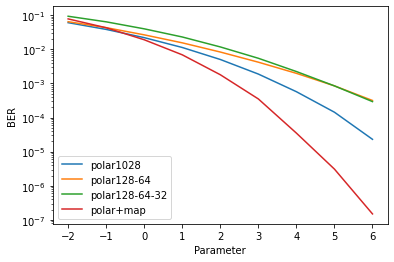

In [3]:
from tensorflow.keras.models import load_model

encoder1,decoder1=load_model('AWGNEncoder_3_polar.h5',custom_objects={'AWGN':AWGN,'polar_metric':polar_metric}),load_model('AWGNDecoder_3_polar.h5',custom_objects={'AWGN':AWGN},compile=False)
encoder2,decoder2=load_model('AWGNEncoder_3_polar2.h5',custom_objects={'AWGN':AWGN,'polar_metric':polar_metric}),load_model('AWGNDecoder_3_polar2.h5',custom_objects={'AWGN':AWGN},compile=False)
encoder3,decoder3=load_model('AWGNEncoder_3_polar3.h5',custom_objects={'AWGN':AWGN,'polar_metric':polar_metric}),load_model('AWGNDecoder_3_polar3.h5',custom_objects={'AWGN':AWGN},compile=False)

#encoder_list,decoder_list=[encoder1],[decoder1]
encoder_list,decoder_list=[encoder1,encoder2,encoder3],[decoder1,decoder2,decoder3]
computeBER(encoder_list,decoder_list,['normal','normal','normal'],['normal','normal','normal'],'AWGN',[-2,-1,0,1,2,3,4,5,6],do_polar_MAP=True,enc_MAP_ind=[],
        save_params=False,params_name=['AWGNparams.npy'],
        save_ber=False,ber_name=['AWGNber_05.npy','AWGNber_1.npy','AWGNber_2.npy','AWGNber_polarmap.npy','AWGNber_05_map.npy','AWGNber_1_map.npy','AWGNber_2_map.npy'],
        plot_ber=True,points_per_value=2*[100000,200000,200000,400000,400000,1500000,2000000,3000000,5000000],plot_legend=['polar1028','polar128-64','polar128-64-32','polar+map'],
        save_fig=True,fig_name='polarAWGN.pdf')

In [ ]:
from tensorflow.keras.models import load_model

encoder1,decoder1=load_model('AWGNEncoder_m1.h5',custom_objects={'AWGN':AWGN}),load_model('AWGNDecoder_m1.h5',custom_objects={'AWGN':AWGN},compile=False)
encoder2,decoder2=load_model('AWGNEncoder_1.h5',custom_objects={'AWGN':AWGN}),load_model('AWGNDecoder_1.h5',custom_objects={'AWGN':AWGN},compile=False)
encoder3,decoder3=load_model('AWGNEncoder_3.h5',custom_objects={'AWGN':AWGN}),load_model('AWGNDecoder_3.h5',custom_objects={'AWGN':AWGN},compile=False)
encoder4,decoder4=load_model('AWGNEncoder_5.h5',custom_objects={'AWGN':AWGN}),load_model('AWGNDecoder_5.h5',custom_objects={'AWGN':AWGN},compile=False)
encoder5,decoder5=load_model('AWGNEncoder_3_ln.h5',custom_objects={'AWGN':AWGN}),load_model('AWGNDecoder_3_ln.h5',custom_objects={'AWGN':AWGN},compile=False)


#encoder_list,decoder_list=[encoder1],[decoder1]
encoder_list,decoder_list=[encoder1,encoder2,encoder3,encoder4,encoder5],[decoder1,decoder2,decoder3,decoder4,decoder5]
computeBER(encoder_list,decoder_list,['normal','normal','normal','normal','normal'],['normal','normal','normal','normal','normal'],'AWGN',[-2,-1,0,1,2,3,4,5,6],do_polar_MAP=True,enc_MAP_ind=[],
        save_params=False,params_name=['AWGNparams.npy'],
        save_ber=False,ber_name=['AWGNber_05.npy','AWGNber_1.npy','AWGNber_2.npy','AWGNber_polarmap.npy','AWGNber_05_map.npy','AWGNber_1_map.npy','AWGNber_2_map.npy'],
        plot_ber=True,points_per_value=2*[100000,200000,200000,400000,400000,1500000,2000000,2500000,3000000],plot_legend=['-1','1','3','5','3+ln','polar map'],
        save_fig=True,fig_name='normalAWGN.pdf')

 56%|█████▌    | 5/9 [06:27<05:31, 82.81s/it]

100%|██████████| 9/9 [16:57<00:00, 113.08s/it]


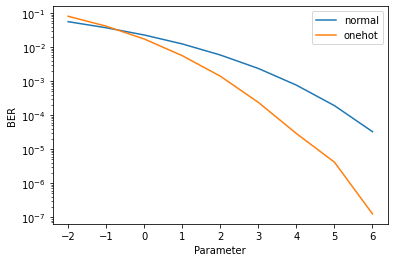

In [3]:
from tensorflow.keras.models import load_model

encoder1,decoder1=load_model('AWGNEncoder_3.h5',custom_objects={'AWGN':AWGN}),load_model('AWGNDecoder_3.h5',custom_objects={'AWGN':AWGN},compile=False)
encoder2,decoder2=load_model('AWGNOHEncoder_3_test.h5',custom_objects={'AWGN':AWGN}),load_model('AWGNOHDecoder_3_test.h5',custom_objects={'AWGN':AWGN},compile=False)

#encoder_list,decoder_list=[encoder1],[decoder1]
encoder_list,decoder_list=[encoder1,encoder2],[decoder1,decoder2]
computeBER(encoder_list,decoder_list,['normal','onehot'],['normal','onehot'],'AWGN',[-2,-1,0,1,2,3,4,5,6],do_polar_MAP=False,enc_MAP_ind=[],
        save_params=False,params_name=['AWGNparams.npy'],
        save_ber=False,ber_name=['AWGNber_05.npy','AWGNber_1.npy','AWGNber_2.npy','AWGNber_polarmap.npy','AWGNber_05_map.npy','AWGNber_1_map.npy','AWGNber_2_map.npy'],
        plot_ber=True,points_per_value=2*[100000,200000,200000,400000,400000,1500000,2000000,2500000,3000000],plot_legend=['normal','onehot'],
        save_fig=True,fig_name='test.pdf')